# ECON408: Assignment 1

Jesse Perla, UBC

## Student Name/Number: Nolan Lu / 92071885

### Instructions

-   Edit the above cell to include your name and student number.
-   Submit just this `ipynb` to Canvas. Do not rename, it associates
    your student number with the submission automatically.

In [1]:
using Distributions, Plots, LaTeXStrings, LinearAlgebra, Statistics, Random

## Question 1

Create the following variables:

-   `D`: A floating point number with the value 10,000
-   `r`: A floating point number with the value 0.025 (i.e., 2.5% net
    interest rate)

Compute the present discounted value of a payment (`D`) made in `t`
years, assuming an interest rate of `r = 2.5%`. Save this value to a new
variable called `PDV` and print your output.

Hint: The formula is

$$
\text{PDV}(D, t) = \frac{D}{(1 + r)^t}
$$

For $t = 10$, calculate this PDV

In [52]:
# add code here 
using Distributions, Plots, LaTeXStrings, LinearAlgebra, Statistics, Random
function calculate_pdv(d,r,t)
    return(d/((1+r)^t))
end

PDV = calculate_pdv(10000,0.025,10)
@show(PDV)

PDV = 7811.984017257273


7811.984017257273

## Question 2

Now assume that you have an asset the pays $D$ every year from
$t = 0,\ldots T$. Write code which will price this as the PDV of all
payoffs,

$$
P_T(D) = \sum_{t=0}^{T}\left(\frac{1}{1+r}
\right)^t D
$$

### Part (a)

Derive the analytic solution for the limit of
$P_{\infty}(D) \equiv \lim_{T\to \infty} P_T(D)$

(doubleclick here to modify. Add other cells as required. No need to
show all of your steps)

$$
\[
P_T(D) = \sum_{t=0}^{T}\left(\frac{1}{1+r}\right)^t D = D + \frac{D}{1+r} + \frac{D}{(1+r)^2} + \cdots + \frac{D}{(1+r)^T}
\]

P_{\infty}(D) = ?
$$

Write the problem in geometric sum formula:


$$
S_T = a \left( \frac{1 - r'^{T+1}}{1 - r'} \right)\\
$$
we know: 
$$
r = \frac{1}{1+r}\\
$$
Listing the function in geometric sum formula and take limit: 

$$
P_{\infty}(D) = \lim_{T\to\infty} P_T(D) = \lim_{T\to\infty} D \left( \frac{1 - \left(\frac{1}{1+r}\right)^{T+1}}{1 - \frac{1}{1+r}} \right)\\
P_{\infty}(D) = \frac{D}{1 - \frac{1}{1+r}} = \frac{D}{\frac{r}{1+r}} = \frac{D(1+r)}{r}\\
P_{\infty}(D) = \frac{D(1+r)}{r}
$$

Alternatively we know perpetuity for R<1 = D/R if cashflow starts at T1. To adjust the formula so the cashflow start at T0, we just need to compound it by 1 period:

$$
P_{\infty}(D) = \frac{D}{r}*(1+r) = \frac{D(1+r)}{r}\\

 ### Part (b)

Plot the price as the horizon increases

-   On the x-axis plot $T = 1, \ldots 30$
-   On the y-axis plot $P_T(D)$ at that horizon
-   Plot a horizontal line at the asymptotic $P_{\infty}$ you calculated

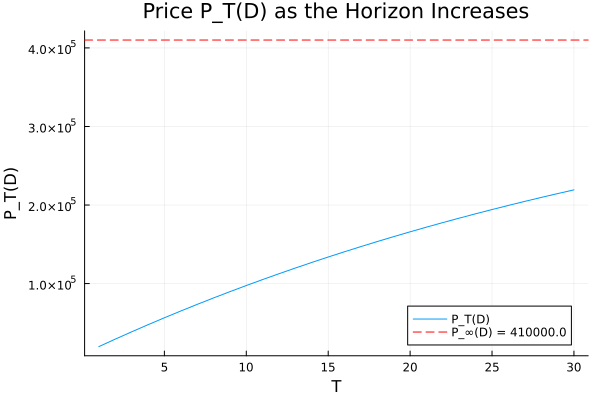

In [19]:
T_max = 30
T = 1:T_max
r = 0.025
D = 10_000
# Function to calculate the present discounted value (PDV)
function calculate_pdv(d, r, t)
    pdv = sum(d / ((1 + r)^k) for k in 0:t)
    return pdv
end

# Calculate P_T(D) for each T
P_values = [calculate_pdv(D, r, t) for t in T]

# Calculate P_infinity(D)
P_infinity = D * (1 + r) / r

# Plotting
plot(T, P_values, label="P_T(D)", xlabel="T", ylabel="P_T(D)", title="Price P_T(D) as the Horizon Increases")
hline!([P_infinity], color=:red, linestyle=:dash, label="P_∞(D) = $(round(P_infinity, digits=2))")

## Question 3

Now instead of having constant dividends, assume that dividends follow
the process

$$\log D_{t+1} = \log D_t + \sigma w_{t+1}
$$

Where

-   $w_{t+1} \sim N(0,1)$ are IID unit random normals
-   $D_0 = 1.0$
-   $\sigma = 0.001$

### Part (a)

Write code to simulate a sequence of dividends with the process and
initial condition for $t = 0, \ldots T = 30$.

In [29]:
T = 30
D_0 = 1.0
sigma = 0.001
# reminder, can draw from N(0,1) with randn()

# Initialize an array to store the dividends
dividends = zeros(T + 1)
dividends[1] = D_0

# Simulate the dividend process
for t in 1:T
    w_t_plus_1 = randn()  # Draw from N(0,1)
    dividends[t + 1] = exp(log(dividends[t]) + sigma * w_t_plus_1)
end

@show dividends

dividends = [1.0, 0.9999573223998222, 1.001991590286271, 0.999638313775874, 1.000210385720623, 0.9994744730015717, 0.9984182031566647, 0.9981716258146097, 0.9961534973747186, 0.9977893767584574, 0.9964508253164126, 0.9975246381554853, 0.9987706601907963, 0.9975893969470593, 0.9970658343958068, 0.9969679067576943, 0.9960222811988232, 0.9953373591578581, 0.9969350370326537, 0.9968595805096211, 0.995952432652997, 0.9945342388445197, 0.9961542088805841, 0.9966417839810253, 0.9960775973063863, 0.9948980827333989, 0.9952314569775907, 0.9967515785744139, 0.996118722414983, 0.9948394595364273, 0.9920097634869977]


31-element Vector{Float64}:
 1.0
 0.9999573223998222
 1.001991590286271
 0.999638313775874
 1.000210385720623
 0.9994744730015717
 0.9984182031566647
 0.9981716258146097
 0.9961534973747186
 0.9977893767584574
 ⋮
 0.9961542088805841
 0.9966417839810253
 0.9960775973063863
 0.9948980827333989
 0.9952314569775907
 0.9967515785744139
 0.996118722414983
 0.9948394595364273
 0.9920097634869977

### Part (b)

Plot three simulated sequences of dividends (i.e, the $D_{t}$ for
$t = 0, \ldots 30$) on the same graph with the shared x-axis.

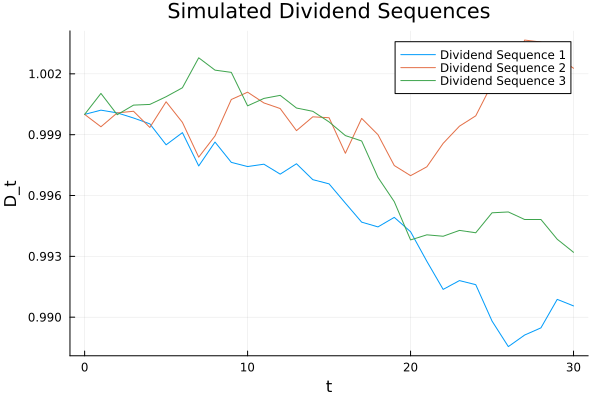

In [75]:
# add code here for plotting using your functions above

function simulate_dividends(D_0, sigma, T, num_simulations)
    all_dividends = Array{Float64,2}(undef, T + 1, num_simulations)

    for sim in 1:num_simulations
        dividends = zeros(T + 1)
        dividends[1] = D_0

        for t in 1:T
            w_t_plus_1 = randn()  # Draw from N(0,1)
            dividends[t + 1] = exp(log(dividends[t]) + sigma * w_t_plus_1)
        end

        all_dividends[:, sim] = dividends
    end

    return all_dividends
end

# Simulate the dividends
num_simulations = 3
simulated_dividends = simulate_dividends(D_0, sigma, T, num_simulations)

# Plotting
plot(legend=:topright, xlabel="t", ylabel="D_t", title="Simulated Dividend Sequences")
for sim in 1:num_simulations
    plot!(0:T, simulated_dividends[:, sim], label="Sequence $(sim)")
end


@show simulated_dividends
plot(0:T, simulated_dividends, label=["Dividend Sequence 1" "Dividend Sequence 2" "Dividend Sequence 3"], legend=:topright, xlabel="t", ylabel="D_t", title="Simulated Dividend Sequences")


## Question 4

Using the simulated sequences of dividends from Question 3, calculate
the $P_T$ assuming perfect foresight (i.e., they were able to know the
sequence of $w_{t+1}$ even for $t \geq 0$). The formula remains the
same, except where $\{D_0, \ldots D_T\}$ is an argument which allows for
time-dependent dividends

$$
P_T(\{D_t\}_{t=0}^T) = \sum_{t=0}^{T}\left(\frac{1}{1+r}
\right)^t D_t
$$

All from the same $D_0 = 1.0$ initial condition calculate the
$P_T(\{D^n_t\}_{t=0}^T)$ for $n = 1, \ldots N$ simulated sequences of
dividends (i.e. see Question 3)

### Part (a)

Calculate the $P_T$ above given a dividend sequence

In [69]:
# add code here for calculating P_T and check results
T = 30
D_0 = 1.0
sigma = 0.001
r = 0.025

#assuming the calculation of PT includes D0
function calculate_PT(dividends, r)
    PT = 0.0
    for t in 1:length(dividends)
        PT += dividends[t] / ((1 + r)^t)
    end
    return PT
end

@show calculate_PT(dividends,r)


calculate_PT(dividends, r) = 21.341763989878473


21.341763989878473

### Part (b)

Plot a histogram of the prices for $N = 100$ simulations and compare to
the deterministic case, which is nested if $\sigma = 0$. (Hint: see [our
lectures](https://jlperla.github.io/ECON408/lectures/intro.html#/more-plotting-examples)
or [Julia By
Example](https://julia.quantecon.org/getting_started_julia/julia_by_example.html)
for more on histograms)

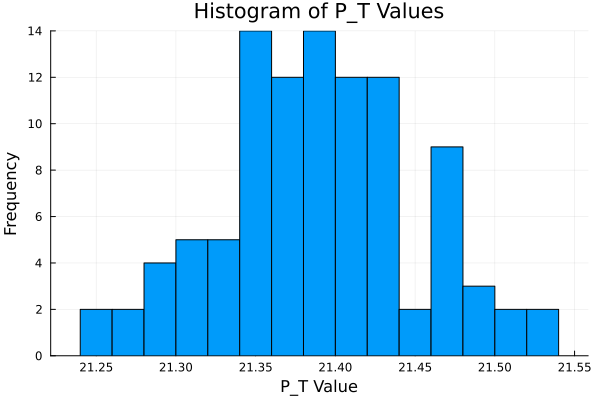

In [74]:
N = 100
# add code here for plotting using your functions above
# hint: use the `histogram` function

#using the previous function built 

simulated_dividends = simulate_dividends(D_0, sigma, T, N)

#initialize PT_values
PT_values = zeros(N)

# Calculate PT for each simulated sequence
for i in 1:N
    dividend_sequence = simulated_dividends[:, i]
    PT_values[i] = calculate_PT(dividend_sequence, r)
end

@show PT_values

# Plotting PT_values as a histogram
histogram(PT_values, bins=20, xlabel="P_T Value", ylabel="Frequency", title="Histogram of P_T Values", legend=false)
